## Implementing the $k$-NN Classification

* Apply the $k$-NN Algorithm
* Using Cross Validation
* Apply Scaling

In [7]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
from seaborn import plt
from sklearn.datasets import load_iris

load_iris?
#describes what data looks like --> sklearn data sets lets us see this

The best data set to validate any classification algorithm's performance is the [Fisher Iris data set](http://en.wikipedia.org/wiki/Iris_flower_data_set), which is commonly included in any stats or machine learning package.

In [8]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score

In [9]:
# Various variables we'll need to set intially.
n_neighbors = range(1, 51, 2)
# going from 1 to 51 with a skip of 2. Skipping 2 so that it's odd - so there are no ties... want ks with odd numbers

In [10]:
print n_neighbors

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


In [11]:
# Load in the data
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Parameter Search

In [12]:
# Create the training (and test) set using scikit-learn's train_test_split function
# could write this by hand... but are going to use scikit-learn's 
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=8)
# including target because want sample set percentage to reflect full set percentage. test size = 30%
# everytime you run withwith randomstate=12, get the same train-test split

# Try this sequence again with the following random seed.
# observe how it changes the scores of K quite dramatically
# X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=8)

In [15]:
X_train.shape

(105, 4)

In [16]:
y_train.shape

(105,)

In [49]:
# Loop through each neighbors value from 1 to 51 and append
# the scores
scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n) #number of neighbors
    clf.fit(X_train, y_train) #try to fit train (70%) 
    scores.append(clf.score(X_test, y_test)) #test to see how good of a generalization it is (on 30%)
    
#doing this for every n (k value 1 to 51 by twos)

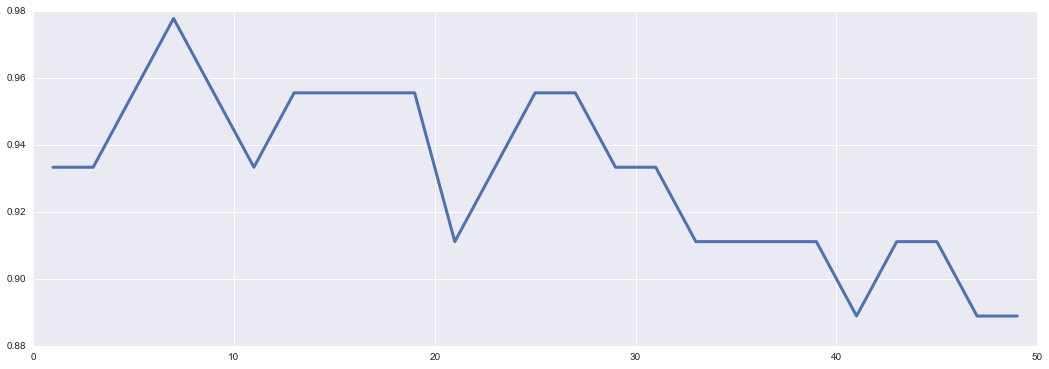

In [50]:
plt.figure(figsize=(18,6))
_ = plt.plot(n_neighbors, scores, linewidth=3.0)
#generalization score... looks like 11 is optimal (using this particular train/test split)

In [51]:
print (n_neighbors, scores)

#what is the better way to do this?

([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49], [0.93333333333333335, 0.93333333333333335, 0.9555555555555556, 0.97777777777777775, 0.9555555555555556, 0.93333333333333335, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.91111111111111109, 0.93333333333333335, 0.9555555555555556, 0.9555555555555556, 0.93333333333333335, 0.93333333333333335, 0.91111111111111109, 0.91111111111111109, 0.91111111111111109, 0.91111111111111109, 0.88888888888888884, 0.91111111111111109, 0.91111111111111109, 0.88888888888888884, 0.88888888888888884])


### Application of Cross Validation

The work above shows that at 11 neighbors, we can get an ideal result that doesn't overfit the data. To verify this, we'll use cross validation.

In [52]:
neighbors.KNeighborsClassifier?

In [53]:
from sklearn.cross_validation import cross_val_score
clf = neighbors.KNeighborsClassifier(7, weights='uniform')
scores = cross_val_score(clf, iris_df.values, iris.target, cv=5) #fit 5 different splits on this data and for each split, train this classifier and score it on the test set
print scores

#why not 500? time

[ 0.96666667  1.          0.96666667  0.96666667  1.        ]


In [54]:
# is this good? is 96% good? Yes. There are time when 60% is good... so it really depends

In [55]:
np.mean(scores)

0.98000000000000009

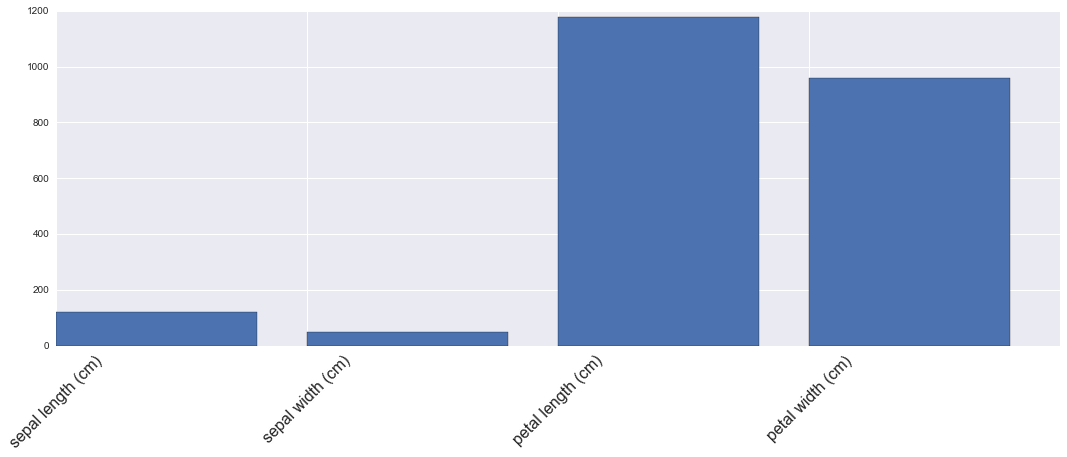

In [56]:
# Below returns highest signifiance for features 2 and 3
# (remember, Python uses index 0). 
n = np.arange(len(iris.feature_names))

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)

ax.bar(n, feature_selection.f_classif(iris.data, iris.target)[0])
# looks at data and targets and identify how much each feature contributes to identify that target

xtickNames = ax.set_xticklabels(iris.feature_names)
ax.set_xticks(n)
_ = plt.setp(xtickNames, rotation=45, fontsize=16)

Fit only the last two features:

In [57]:
clf = neighbors.KNeighborsClassifier(7, weights='uniform')
clf.fit(iris.data[:, 2:4], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=7, p=2, weights='uniform')

In [58]:
h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [59]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, y_min = iris_df.min()[['petal length (cm)', 'petal width (cm)']]
x_max, y_max = iris_df.max()[['petal length (cm)', 'petal width (cm)']]

In [60]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #create predictions for every possible x and y (petal length and width) between the min and max

In [61]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)

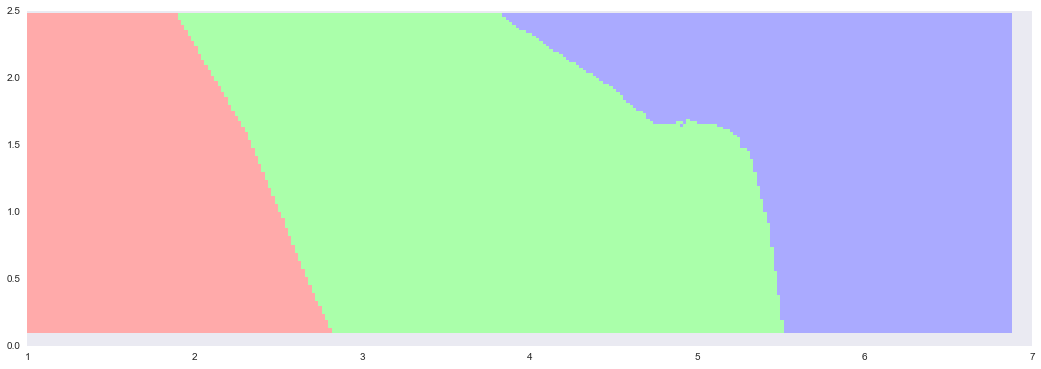

In [62]:
plt.figure(figsize=(18,6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

In [63]:
# the lack of smoothness could be a case of overfitting
# change the k to see how it changes the graph

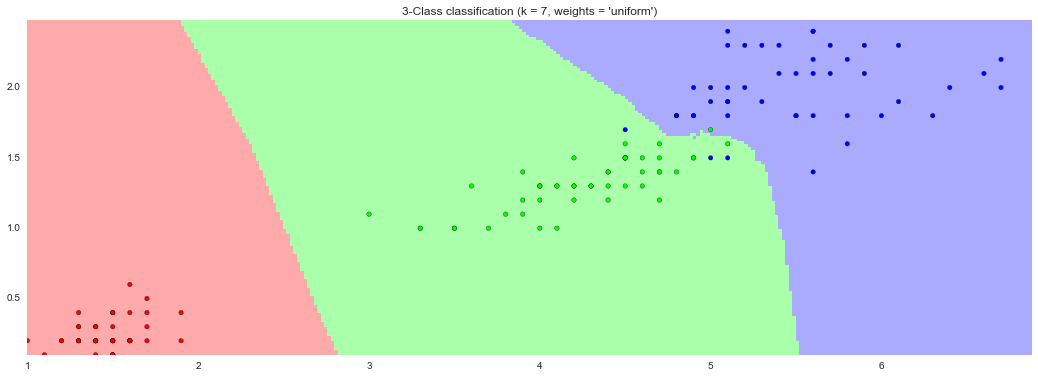

In [64]:
# Plot also the training points
plt.figure(figsize=(18,6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c=iris.target, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = {}, weights = '{}')".format(clf.n_neighbors, clf.weights))

### Scaling

In [40]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
from sklearn.preprocessing import scale

In [42]:
df_norm = pd.DataFrame(scale(iris.data), columns=iris.feature_names)

In [43]:
df_norm.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [44]:
df_norm.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.657933e-15,-1.515825e-15,-8.052818e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


## Lab

1. Rerun the [parameter search](#Parameter-Search) with `random_state=8`. Do you get the same result for the optimal $k$
2. Rerun the whole lab but using [scaled](#Scaling) data

## Show and Tell